<a href="https://colab.research.google.com/github/mvadrev/Robotics/blob/main/Robotics_Sensor_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.stats import norm
def p_hit(z_meas, z_true, sigma, z_max):
  cdf_max = norm.cdf(z_max, z_true, sigma)
  cdf_start = norm.cdf(0, z_true, sigma)
  cdf_final = cdf_max - cdf_start
  return cdf_final * norm.pdf(z_meas, z_true, sigma)

def p_short(z_meas, z_true, l_short):
  expo = np.exp(-l_short * z_meas)
  norm = 1 / (1- np.exp(-l_short * z_true))
  return norm * l_short * expo

def p_max(z_meas, z_max):
  if (z_meas == z_max):
    P_max = 1
  else:
    P_max = 0
  return P_max

def prob(z_meas, z_true, z_max, z_weight, sigma, l_short):
    hit = z_weight[0] * p_hit(z_meas, z_true, sigma, z_max)
    short = z_weight[1] * p_short(z_meas, z_true, l_short)
    max = z_weight[2] * p_max(z_meas, z_max)
    rand = z_weight[3] * (1 / z_max)
    return hit + short + max + rand 

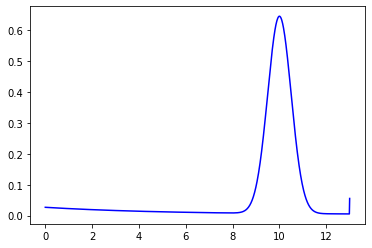

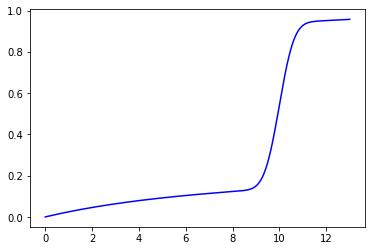

In [ ]:
import matplotlib.pyplot as plt

z_meas = np.linspace(0, 13, 1000)
z_true = 10
z_max = 13
sigma = 0.5
l_short = 0.2

z_weights = [0.8, 0.1, 0.05, 0.05]

probs = []
for z in z_meas:
  probs.append(prob(z, z_true, z_max, z_weights, sigma, l_short))

fig, ax = plt.subplots(1, 1)
ax.plot(z_meas, probs,'b-')
plt.show()


cdf = np.cumsum(probs)*(z_meas[1]-z_meas[0])

fig, ax = plt.subplots(1, 1)
ax.plot(z_meas, cdf,'b-')
plt.show()